# Find the root of $f(f(f(f(x))))$
## $f(x)=x^3-2.2x$
> 2019/08/05 20:29 By Yibei 

In [3]:
def ffffx(x):
    for i in range(4):
        fx=x**3-2.2*x
        x=fx
    return fx
x0=-1000
x1=500
tol=1e-10
N=10
def bisection(x0,x1,tol,N):
    for i in range(N):
        x2=(x1+x0)/2
        print('Steps: ',i,' ffffx: ',ffffx(x2),' root: ',x2)
        if ffffx(x0)*ffffx(x2)<0:
            x1=x2
        else:
            x0=x2
        if x1-x0<=tol:
            print("After {} steps,find the root:{}".format(i+1,x2))
            break
        if i==N-1:
            print('Sorry, failure to find the root within {} iterating steps!'.format(i+1))
    return x2 
root=bisection(x0,x1,tol,N)
print('root:',root)

Steps:  0  ffffx:  -1.7089444330010278e+194  root:  -250.0
Steps:  1  ffffx:  7.047903084998573e+169  root:  125.0
Steps:  2  ffffx:  -2.8818773168903526e+145  root:  -62.5
Steps:  3  ffffx:  1.1386905707789174e+121  root:  31.25
Steps:  4  ffffx:  -3.919924050878299e+96  root:  -15.625
Steps:  5  ffffx:  7.6822196516959e+71  root:  7.8125
Steps:  6  ffffx:  -1.2693850719064136e+46  root:  -3.90625
Steps:  7  ffffx:  3063404606583.4346  root:  1.953125
Steps:  8  ffffx:  -0.7840631425781723  root:  -0.9765625
Steps:  9  ffffx:  1.2558266496770485  root:  0.48828125
Sorry, failure to find the root within 10 iterating steps!
root: 0.48828125


After 115 iterations, the root is 3.141592653589785


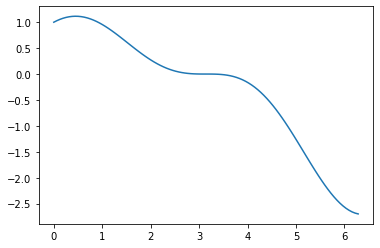

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,2*np.pi,101)
y=np.sqrt(1+x)*(np.cos(x/2))**3
plt.plot(x,y)
#!/usr/bin/env python3
import numpy as np
x0 = 1 # set initial estimate x0
x1 = 2 # set initial estimate x1
tol = 1e-15 # set the tolerance as 10^-15
def f(x):
    return np.sqrt(x+1)*np.cos(x/2)**3
# loop 500 times OR convergence reached
for i in range(500):
    # store the function values
    fx0 = f(x0)
    fx1 = f(x1)
    # iterate the secant method
    x2 = x1 - fx1 * (x1-x0)/(fx1-fx0)
    interval = abs(x2-x1)/abs(x1)
    # check convergence
    if interval <= tol:
        N = i + 1
        rootFound = True
        break
    # iterate variables ready for next loop
    x0 = x1
    x1 = x2
else:
    rootFound = False
if rootFound:
    print('After {} iterations, the root is {}'.format(N,x2))
else:
    print('Secant method did not converge')

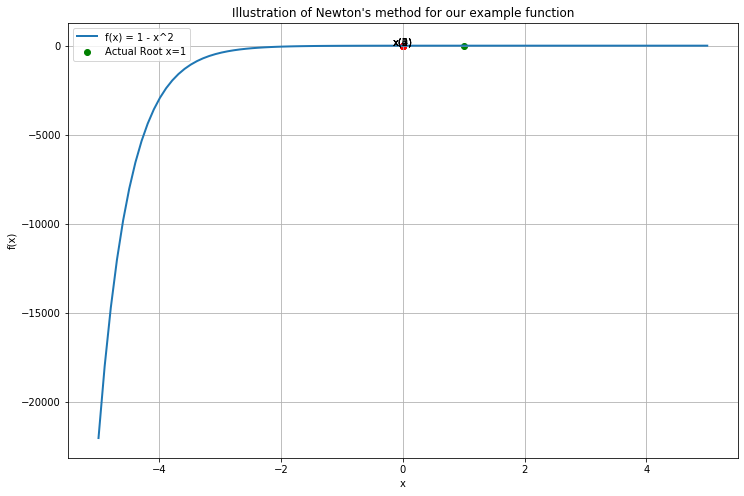

In [9]:
# Based on the image, we need to replicate the plot for the Newton-Raphson method
# The exact function is not provided, but we can see that it's a decreasing function
# We'll use a similar decreasing function for the example
# Let's assume the function is f(x) = 1 - x^2, which has a root at x=1

def example_function(x):
    return 1- np.exp(-2*x)

def derivative_example_function(x):
    return  -2*np.exp(-2*x)

# Initial guess for the root
x_n = 0.0

# Prepare lists to store the x and f(x) values for plotting the iterations
x_values = [x_n]
f_values = [example_function(x_n)]

# Perform 3 iterations of the Newton-Raphson method
for _ in range(5):
    f_n = example_function(x_n)
    df_n = derivative_example_function(x_n)
    # Newton-Raphson iteration
    x_n = x_n - f_n / df_n
    x_values.append(x_n)
    f_values.append(example_function(x_n))

# Prepare the plot range
x_plot = np.linspace(-5, 5, 100)
y_plot = example_function(x_plot)

# Plot the example function
plt.figure(figsize=(12, 8))
plt.plot(x_plot, y_plot, label='f(x) = 1 - x^2', lw=2)

# Plot the iterations
for i in range(len(x_values) - 1):
    # Draw the tangent line from x(i) to x(i+1)
    x_tangent = np.linspace(x_values[i], x_values[i+1], 10)
    y_tangent = f_values[i] + derivative_example_function(x_values[i]) * (x_tangent - x_values[i])
    plt.plot(x_tangent, y_tangent, 'k--', lw=1)

    # Draw vertical dotted lines to the x-axis
    plt.plot([x_values[i+1], x_values[i+1]], [0, f_values[i+1]], 'k:', lw=1)

    # Label the points x(i)
    plt.text(x_values[i], -0.05, f'x({i})', ha='center')

# Mark the root approximation points on the function
plt.scatter(x_values, f_values, color='red')

# Mark the actual root
plt.scatter(1, 0, color='green', label='Actual Root x=1')

# Enhancements
plt.title('Illustration of Newton\'s method for our example function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


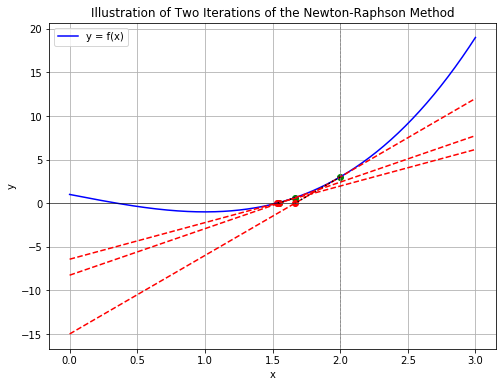

([2, 1.6666666666666667, 1.548611111111111],
 [1.6666666666666667, 1.548611111111111, 1.5323901618653801])

In [4]:
# From the image provided, we infer the function is cubic and the initial guess is close to 2.
# We will try to replicate the behavior seen in the image. The exact function is not given, but
# we will use a cubic function with a similar shape. We'll use x^3 - 3x + 1, which has a root near 1.
# We'll perform two iterations starting from an initial guess x0 near 2.

def f_inferred(x):
    return x**3 - 3*x + 1

def df_inferred(x):
    return 3*x**2 - 3

# Initial guess x0 close to 2 as seen in the image
x0_inferred = 2
x_inferred = [x0_inferred]
y_inferred = [f_inferred(x0_inferred)]

# Perform two iterations of the Newton-Raphson method
for _ in range(2):
    x_new = x_inferred[-1] - f_inferred(x_inferred[-1]) / df_inferred(x_inferred[-1])
    x_inferred.append(x_new)
    y_inferred.append(f_inferred(x_new))

# Generate tangent lines for each x value
x_values = np.linspace(0, 3, 400)
tangent_lines = [df_inferred(xi)*(x_values - xi) + f_inferred(xi) for xi in x_inferred]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_inferred(x_values), label='y = f(x)', color='blue')

# Plot the tangent lines and the points of tangency
for xi, yi, tangent in zip(x_inferred, y_inferred, tangent_lines):
    plt.plot(x_values, tangent, 'r--')
    plt.plot([xi, xi - yi / df_inferred(xi)], [yi, 0], 'k:')  # Line from tangent intersection to function
    plt.scatter(xi, yi, color='green')

# The x-axis intersections
intersections = [xi - yi / df_inferred(xi) for xi, yi in zip(x_inferred, y_inferred)]
for point in intersections:
    plt.scatter(point, 0, color='red')

# Enhancements
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(x0_inferred, color='black', linestyle=':', linewidth=0.5)
plt.title('Illustration of Two Iterations of the Newton-Raphson Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Output the x-values and the intersections for reference
x_inferred, intersections


Found solution after 5 iterations.


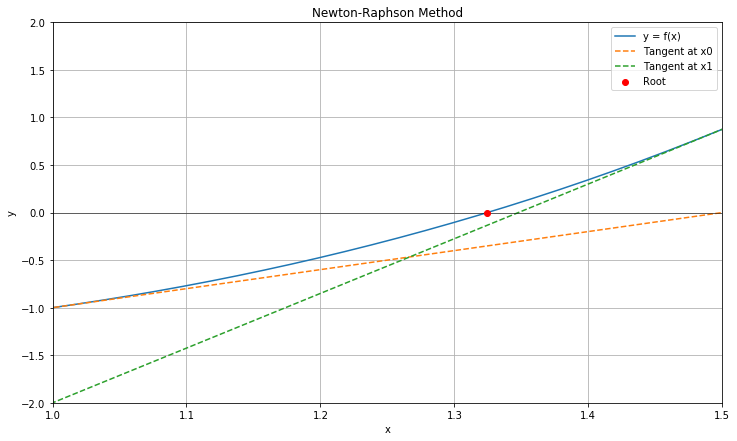

1.3247179572447898

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - x - 1

def df(x):
    return 3*x**2 - 1

# Implement the Newton-Raphson method
def newton_raphson(f, df, x0, tol=1e-10, max_iter=1000):
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            print('Found solution after', n, 'iterations.')
            return xn
        dfxn = df(xn)
        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

# Initial guess
x0 = 1
root = newton_raphson(f, df, x0)

# Plotting the function and the tangent lines for the Newton-Raphson iterations
x = np.linspace(-2, 2, 400)
y = f(x)

# Tangent lines will be plotted at x0 and the next guess x1
x1 = x0 - f(x0)/df(x0)
tangent_line_0 = df(x0)*(x - x0) + f(x0)
tangent_line_1 = df(x1)*(x - x1) + f(x1)

# Plot the function
plt.figure(figsize=(12, 7))
plt.plot(x, y, label='y = f(x)')

# Plot the tangent lines
plt.plot(x, tangent_line_0, label='Tangent at x0', linestyle='--')
plt.plot(x, tangent_line_1, label='Tangent at x1', linestyle='--')

# Plot the root
plt.scatter([root], [0], color='red', zorder=5, label='Root')

# Plot the x-axis
plt.axhline(0, color='black', linewidth=0.5)

# Annotations and labels
plt.title('Newton-Raphson Method')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1,1.5)
plt.ylim(-2,2)
plt.legend()
plt.grid(True)
plt.show()

# Output the root
root


# MARKDOWN
<font  size = 20  color = red>$e^{x-\sqrt{x}}$</font>   

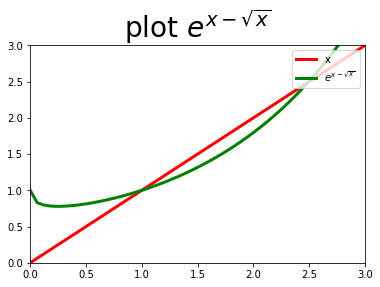

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,2*np.pi,101)
y1=x
y2=np.exp(x-x**0.5)
plt.plot(x,y1,color='red',linewidth=3,label='x')
plt.plot(x,y2,color='green',linewidth=3,label='$e^{x-\sqrt{x}}$')
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('plot $e^{x-\sqrt{x}}$',fontsize=28)
plt.legend(loc='upper right')
plt.show()

# $mg=F_{drag}$

## Final veloctity

In [14]:

import numpy as np

def air_density(h,H=8400):
    """Calculate air density based on altitude. 
    A simplified version of the standard atmospheric model
    can be used here."""
    # Example: Simplified atmospheric model
    # Simplified model, unit: kg/m^3
    rho_h=1.225 * np.exp(-h / H)
    return rho_h  

def drag_force(v, C_d, S, h):
    """Calculate the drag force 
    at a given velocity and altitude."""
    rho_h = air_density(h)
    F = 0.5 * C_d * S * rho_h * v**2
    return F

def balance_condition(v, m, g, C_d, S, h):
    """Check whether the balance condition is satisfied."""
    return drag_force(v, C_d, S, h) - m * g

def find_terminal_velocity(m, g, C_d, A, h, v_min, v_max, tolerance):
    """Use the bisection method to find the 
    terminal velocity at different altitudes."""
    while v_max - v_min > tolerance:
        v_mid = (v_min + v_max) / 2
        if balance_condition(v_mid, m, g, C_d, A, h) > 0:
            v_max = v_mid
        else:
            v_min = v_mid
    return (v_min + v_max) / 2

# Parameter settings
m = 80  # Athlete's mass, unit: kg
g = 9.81  # Gravitational acceleration, unit: m/s^2
C_d = 1.2 # Drag coefficient
H=8400
S = 0.7   # Contact area with air, unit: m^2
h = 4000  # Altitude, unit: m
v_min = 0  # Initial minimum velocity
v_max = 10000  # Initial maximum velocity
tolerance = 1e-5  # Tolerance

# Calculate terminal velocity at different altitudes
terminal_velocity = find_terminal_velocity(m, g, C_d, S, h, v_min, v_max, tolerance)
print(f"The terminal velocity at an altitude of {h} meters is: {terminal_velocity:.2f} meters/second")

The terminal velocity at an altitude of 4000 meters is: 49.56 meters/second


## Final time

In [3]:

import numpy as np

def air_density(h):
    """Calculate air density based on altitude using a simplified atmospheric model."""
    return 1.225 * np.exp(-h / 8400)  # Simplified model, unit: kg/m^3

def acceleration(v, m, g, C_d, A, h):
    """Calculate the acceleration at a given velocity and altitude."""
    return g - 0.5 * C_d * A * air_density(h) * v**2 / m

def simulate_fall(m, g, C_d, A, h_initial, v_initial, dt, max_time):
    """Simulate the falling process of a body until it reaches terminal velocity."""
    t = 0
    v = v_initial
    h = h_initial
    v_terminal = 0

    while t < max_time:
        acc = acceleration(v, m, g, C_d, A, h)
        v_new = v + acc * dt
        h -= v * dt  # Subtract because the body is falling
        t += dt

        # Check if terminal velocity is reached (very small change in velocity)
        if abs(v_new - v) < 1e-6:
            v_terminal = v_new
            break

        v = v_new

    return t, h, v_terminal

# Parameter settings
m = 80.0    # Athlete's mass, unit: kg
g = 9.81    # Gravitational acceleration, unit: m/s^2
C_d = 1.2   # Drag coefficient
A = 0.7     # Contact area with air, unit: m^2
h_initial = 5000  # Initial altitude, unit: m
v_initial = 0     # Initial velocity, unit: m/s
dt = 0.01         # Time step, unit: s
max_time = 200    # Maximum simulation time, unit: s

# Simulate the fall
time_to_max_speed, height_at_max_speed, terminal_velocity = simulate_fall(m, g, C_d, A, h_initial, v_initial, dt, max_time)
print(f"Time to reach terminal velocity: {time_to_max_speed:.2f} seconds")
print(f"Altitude at terminal velocity: {height_at_max_speed:.2f} meters")
print(f"Terminal velocity: {terminal_velocity:.2f} meters/second")

Time to reach terminal velocity: 14.70 seconds
Altitude at terminal velocity: 4427.23 meters
Terminal velocity: 50.83 meters/second


# Fixed point method
- Created by your name 20231120

In [10]:
import numpy as np

def g(x):
    return np.exp(x - x**0.5)

def fixed_point(x0, g, k=100, tol=1e-8):
    for i in range(k):
        xnew = g(x0)
#         print('Step {}: x0 = {}, g(x) = {}'.format(i,x0,xnew))
        print(f'Step {i}: x0 = {x0}, g(x) = {xnew}')
        if abs(xnew - x0) < tol:
            return xnew
        x0 = xnew
    return xnew

x = fixed_point(2.3, g)
print(x)

Step 0: x0 = 2.3, g(x) = 2.1889564232423324
Step 1: x0 = 2.1889564232423324, g(x) = 2.032861077306344
Step 2: x0 = 2.032861077306344, g(x) = 1.8350591304239645
Step 3: x0 = 1.8350591304239645, g(x) = 1.616746160874971
Step 4: x0 = 1.616746160874971, g(x) = 1.4123187058450561
Step 5: x0 = 1.4123187058450561, g(x) = 1.2509566103573269
Step 6: x0 = 1.2509566103573269, g(x) = 1.1416731869970584
Step 7: x0 = 1.1416731869970584, g(x) = 1.0759264533355928
Step 8: x0 = 1.0759264533355928, g(x) = 1.0394146377903988
Step 9: x0 = 1.0394146377903988, g(x) = 1.0200970531356888
Step 10: x0 = 1.0200970531356888, g(x) = 1.010149674027725
Step 11: x0 = 1.010149674027725, g(x) = 1.0051006131249376
Step 12: x0 = 1.0051006131249376, g(x) = 1.0025568134134475
Step 13: x0 = 1.0025568134134475, g(x) = 1.0012800413800984
Step 14: x0 = 1.0012800413800984, g(x) = 1.0006404303603185
Step 15: x0 = 1.0006404303603185, g(x) = 1.000320317723399
Step 16: x0 = 1.000320317723399, g(x) = 1.0001601845132455
Step 17: x0 =

# Bisection method

In [13]:
import numpy as np

def f(x):
    return np.exp(x - x**0.5) - x

def bisection_method(x0, x1, f, kmax=100, tol=1e-8):
    f0 = f(x0)
    f1 = f(x1)
    for i in range(kmax):
        x2 = (x0 + x1) / 2
        f2 = f(x2)
        if f2 == 0:  
            break
        elif f0 * f2 < 0:
            x1 = x2
            f1 = f2
        else:
            x0 = x2
            f0 = f2
        x2new=(x0+x1)/2
        xdiff = abs(x2new - x2)
        if abs(xdiff/x2new) < tol:
            break
        print(i, x2)
    return x2

x = bisection_method(1, 3.5, f,kmax=5)
print(x)

0 2.25
1 2.875
2 2.5625
3 2.40625
4 2.484375
2.484375


# Newton Method

In [15]:
# Define the function for which we want to find the root
def f(x):
    return np.exp(x - np.sqrt(x)) - x

# Define the derivative of the function
def df(x):
    # The derivative is calculated using the chain rule and the power rule
    return np.exp(x - np.sqrt(x)) * (1 - 0.5 / np.sqrt(x)) - 1

# Newton-Raphson method for finding the root of a function
def newton_raphson(x0, tol=1e-10, max_iter=1000):
    x = x0
    for i in range(max_iter):
        # Update x using the Newton-Raphson formula
        x_new = x - f(x) / df(x)
        # Check for convergence
        if abs(x_new - x) < tol:  
            # Return the found root and the number of iterations
            return x_new, i+1 
        # Prepare for the next iteration
        x = x_new 
    # If no convergence, raise an error
    raise ValueError(f"Root not found within {max_iter} iterations.")  

# Initial guess for the root
initial_guess = 10
try:
    # Attempt to find the root using the Newton-Raphson method
    root, iterations = newton_raphson(initial_guess)
    print(f"The root of the equation is approximately: {root}, found after {iterations} iterations.")
except ValueError as e:
    # If the root is not found within the maximum number of iterations, print an error message
    print(e)


The root of the equation is approximately: 2.4909093169459857, found after 13 iterations.


# Secant Method
- 20231123

In [16]:
# Secant method to find the root of a function
def secant_method(x0, x1, f, tol=1e-10, max_iter=1000):
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if f_x1 - f_x0 == 0:
            raise ValueError("Division by zero encountered in secant method.")
        
        # Use the secant method formula to find the new estimate of the root
        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        # Check for convergence
        if abs(x_new - x1) < tol:
            return x_new, i+1  # Return the found root and the number of iterations
        
        x0, x1 = x1, x_new  # Update the previous two estimates for the next iteration
    
    raise ValueError(f"Root not found within {max_iter} iterations.")  # If no convergence, raise an error

# Initial guesses for the root
x0 = 10
x1 = x0 - 1  # A different initial guess to start the secant method

try:
    # Attempt to find the root using the Secant method
    root, iterations = secant_method(x0, x1, f)
    print(f"The root of the equation is approximately: {root}, found after {iterations} iterations.")
except ValueError as e:
    # If the root is not found within the maximum number of iterations, print an error message
    print(e)


The root of the equation is approximately: 2.4909093169459853, found after 17 iterations.


# Ridder's Method
- 2023/12/3

In [17]:
def ridders_method(f, x0, x1, tol):
    """Ridders' method for finding a root of a function between initial guesses x0 and x1."""
    if f(x0) * f(x1) > 0:
        print("No roots found.")
        return None

    while (x1 - x0) / 2.0 > tol:
        x2 = (x0 + x1) / 2.0
        fx0=f(x0)
        fx1=f(x1)
        fx2 = f(x2)
        # Check if f(x2) is zero, indicating x2 is the root
        if fx2 == 0:
            return x2

        # Ridders' formula to estimate the root
        x3 = x2 + (x1 - x2)  * (fx2/fx0) / np.sqrt((fx2/fx0)**2 - fx1/fx0)
        fx3 = f(x3)

        # Check if f(x3) is zero, indicating x3 is the root
        if fx3 == 0:
            return x3

        # If f(x2) and f(x3) have different signs, root lies between x2 and x3
        if np.sign(fx2) != np.sign(fx3):
            x0, x1 = x2, x3
        # If f(x0) and f(x3) have different signs, root lies between x0 and x3
        elif np.sign(f(x0)) != np.sign(fx3):
            x1 = x3
        # If f(x1) and f(x3) have different signs, root lies between x3 and x1
        elif np.sign(f(x1)) != np.sign(fx3):
            x0 = x3
        else:
            # If none of the above conditions are met, no root is found in this interval
            print("No roots found.")
            return None

    return (x0 + x1) / 2.0

# Example usage of the modified Ridders' method
# Define a test function, for example: f(x) = x^2 - 4
def test_function(x):
    return x**2 - 4

# Initial guesses
x0 = 0
x1 = 3
tol = 1e-6

# Find the root using Ridders' method
root = ridders_method(test_function, x0, x1, tol)
root

2.0

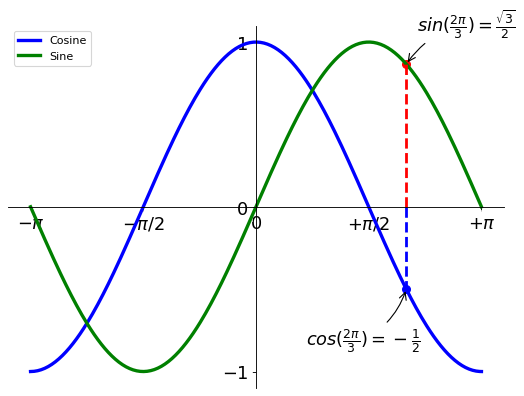

In [21]:
#% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X=np.linspace(-np.pi,np.pi,256,endpoint=True)
C=np.cos(X)
S=np.sin(X)

# Create a new figure of size 8*6 inches, 80 dots per inch
plt.figure(figsize=(8,6),dpi=80)

# Create a new subplot from a grid of 1*1 grid
plt.subplot(1,1,1)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X,C,color="blue",linewidth=3.0,linestyle="-",label='Cosine')

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X,S,color="green",linewidth=3.0,linestyle="-",label="Sine")

# Set x limits
#plt.xlim(-4.0,4,0)
plt.xlim(X.min()*1.1,X.max()*1.1)

# Set x ticks
#plt.xticks(np.linspace(-4,4,9,endpoint="Ture"))
#plt.xticks(np.linspace(X.min()*1.1,X.max()*1.1,9,endpoint="Ture"))
#plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# Set y limit
plt.ylim(C.min()*1.1,C.max()*1.1)


# Set y ticks
#plt.yticks(np.linspace(-1.0,1.0,5,endpoint="Ture"))
#plt.yticks(np.linspace(C.min()*1.1,C.max()*1.1,5,endpoint="Ture"))
#plt.yticks([-1.0,0,1.0])
plt.yticks([-1.0,0,1.0],[r'$-1$',r'$0$',r'$1$'])

# Spines are the lines connecting the axis tick marks 
# and noting the boundaries of the data area. 
ax = plt.gca() # gca stands for 'get current axis'
# Discard the top and right spines by setting their color to none 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Move the bottom and left ones to coordinate 0 in data space coordinates.
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Legend
plt.legend(loc='upper left')

# Annotate some points
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$cos(\frac{2\pi}{3} )=-\frac{1} {2} $',
             xy=(t, np.cos(t)), 
             xycoords='data',
             xytext=(-90, -50), 
             textcoords='offset points', 
             fontsize=16,
             arrowprops=dict(arrowstyle="->", 
                             connectionstyle="arc3,rad=.2"))
plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')
plt.annotate(r'$sin(\frac{2\pi}{3} )=\frac{\sqrt{3} }{2} $',
             xy=(t, np.sin(t)), 
             xycoords='data',
             xytext=(+10, +30), 
             textcoords='offset points', 
             fontsize=16,
             arrowprops=dict(arrowstyle="->", 
                             connectionstyle="arc3,rad=.2"))
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))
# Show result on screen
plt.show()